In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
proj = '52Cr'
trg = '147Sm'
cn = '199Rn'
bf = 0.60
ch = 'xn'
sigr = 3.0
# bf_diff = 0.01

In [3]:
df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df10_mb.describe()

,E_lab,E*/MeV,190Rn,191Rn,192Rn,193Rn,194Rn,195Rn,196Rn,197Rn,198Rn,199Rn
count,74.000000,74.000000,74.0,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,74.0
mean,254.407797,54.500000,0.0,5.604054e-17,1.000097e-12,1.939681e-10,7.073483e-10,4.653172e-08,9.947512e-08,4.598027e-07,4.381545e-09,0.0
std,29.113319,21.505813,0.0,3.655026e-16,2.768172e-12,3.432466e-10,1.334836e-09,9.783878e-08,2.299769e-07,1.055604e-06,3.427060e-08,0.0
min,204.996000,18.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,229.702250,36.250000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,254.408000,54.500000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,279.113500,72.750000,0.0,0.000000e+00,0.000000e+00,2.782500e-10,5.615000e-10,2.007500e-08,2.110000e-08,7.947500e-08,0.000000e+00,0.0
max,303.819000,91.000000,0.0,3.020000e-15,1.160000e-11,1.080000e-09,4.550000e-09,3.590000e-07,8.900000e-07,3.980000e-06,2.950000e-07,0.0


In [4]:
e_lab = [227,230,237,241,257,265]
exp_data=[[np.nan,np.nan,np.nan,np.nan,5.94E-08,3.18E-08],[3.80E-08,6.58E-08,6.10E-07,3.72E-07,np.nan,np.nan],[1.62E-06,1.27E-06,5.24E-07,4.61E-07,np.nan,np.nan],]
exp_data=np.array(exp_data)

In [5]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')

dfm10=dfm10_mb
df10=df10_mb

dfm0=dfm0_mb
df0=df0_mb

mb=1
ub=1e3
nb=1e6

scale=ub

dfm10['CS']=dfm10_mb['CS']*scale
dfm0['CS']=dfm0_mb['CS']*scale
exp_data=exp_data*scale


/tmp/ipykernel_24989/3818921323.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[7:-2]))], palette=colors)
/tmp/ipykernel_24989/3818921323.py:12: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[7:-2]))], palette=colors, ls=':', legend=None)


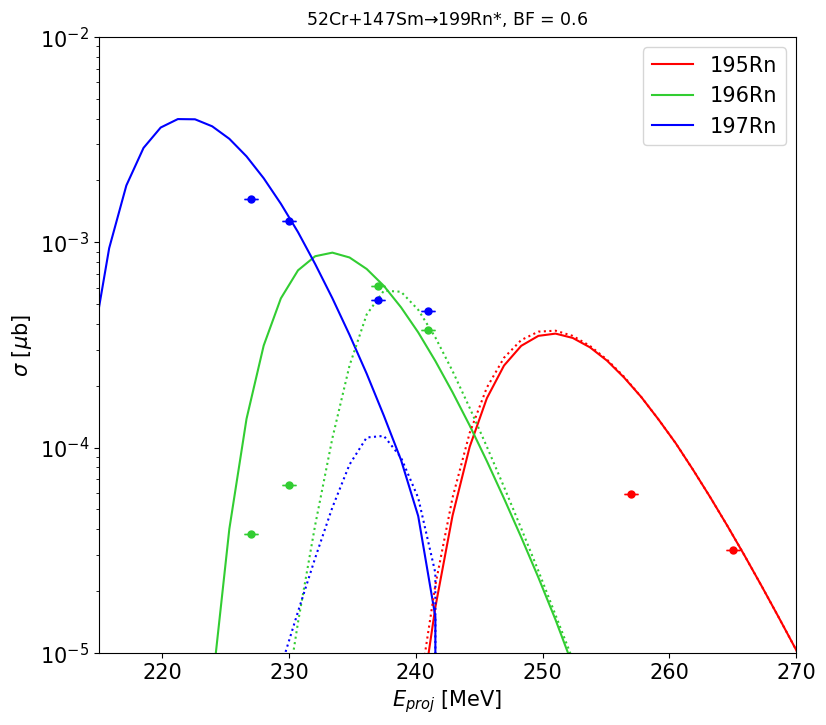

In [13]:
plt.rcParams.update({'font.size': 15})
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

y_lower = 1e-5
y_upper = 1e-2
x_lower = 215
x_upper = 270

fig,ax=plt.subplots(figsize=(9,8))

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[7:-2]))], palette=colors)
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[7:-2]))], palette=colors, ls=':', legend=None)

plt.title(proj + '+' + trg + r'$\to$' + cn + '*' + ', BF = ' + str(bf), va='bottom', fontsize='small')

plt.semilogy()
plt.ylim(y_lower,y_upper)
plt.xlim(x_lower,x_upper)

# for energy in e_lab:
#     plt.plot([energy, energy], [y_lower, y_upper], linewidth=1, color='black', linestyle='--')
#     plt.text(energy-2, y_upper*0.5, str(energy), rotation=90)
    
for i in range(len(exp_data)):
    (_, caps, _) = plt.errorbar(e_lab, exp_data[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)

if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png', bbox_inches='tight')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf', bbox_inches='tight')